In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LinearRegression

sns.set_theme(style="whitegrid", context='talk', font_scale=1.5, font="Helvetica")

In [2]:
advertising = pd.read_csv('./datasets/Advertising.csv', index_col=0)

In [3]:
advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<Axes: xlabel='newspaper', ylabel='sales'>

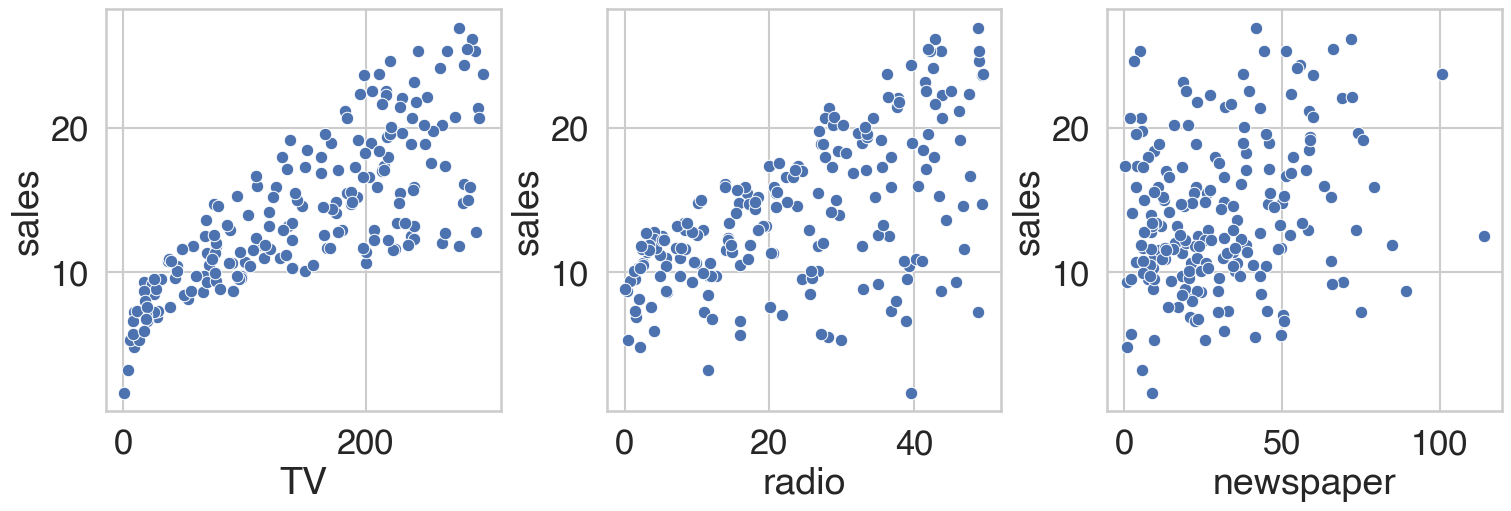

In [4]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(15,5),
    constrained_layout=True)
axes = axes.flatten()

sns.scatterplot(data=advertising, x='TV', y='sales', ax=axes[0])

sns.scatterplot(data=advertising, x='radio', y='sales', ax=axes[1])

sns.scatterplot(data=advertising, x='newspaper', y='sales', ax=axes[2])

In [5]:
income = pd.read_csv('./datasets/Income1.csv', index_col=0)
income2 = pd.read_csv('./datasets/Income2.csv', index_col=0)

In [6]:
income2.head()

,Education,Seniority,Income
1,21.586207,113.103448,99.917173
2,18.275862,119.310345,92.579135
3,12.068966,100.689655,34.678727
4,17.034483,187.586207,78.702806
5,19.931034,20.000000,68.009922


<Axes: xlabel='Education', ylabel='Income'>

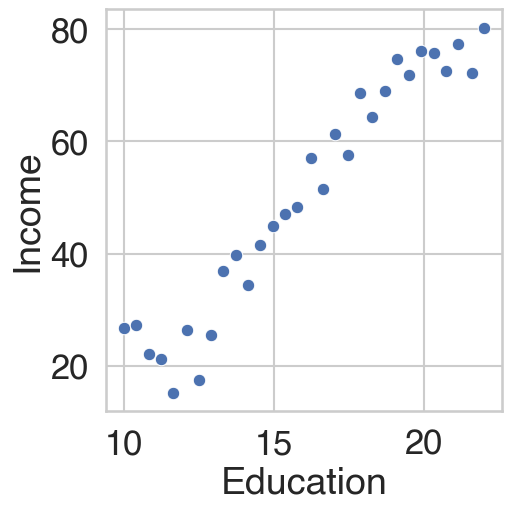

In [7]:
fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(5,5),
    constrained_layout=True)

sns.scatterplot(data=income, x='Education', y='Income', ax=ax)

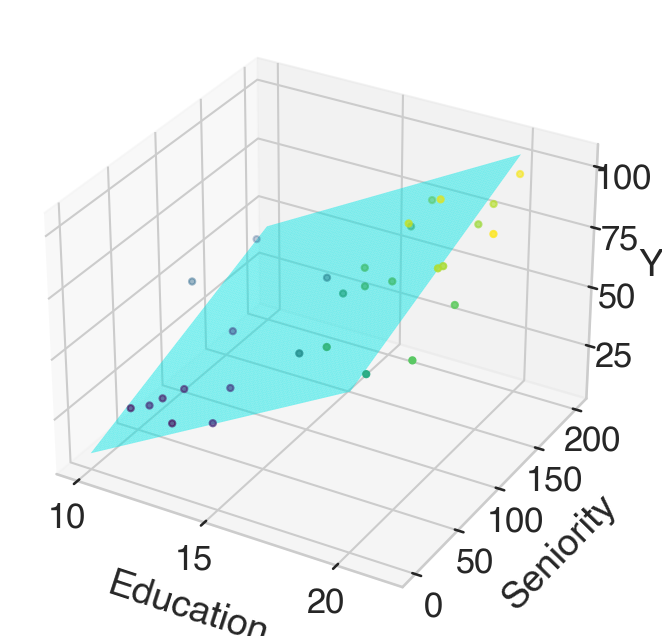

In [8]:
X = income2.Education
Y = income2.Seniority
Z = income2.Income

# Create the figure and 3D axis
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# Plot the scatter
ax.scatter(X, Y, Z, c=Z, cmap='viridis', marker='o')


# Prepare data for regression
XY = np.column_stack((X, Y))
# Fit a linear regression model
model = LinearRegression()
model.fit(XY, Z)

# Create grid to plot the regression plane
X_grid, Y_grid = np.meshgrid(np.linspace(10, 20, 100), np.linspace(0, 200, 100))
Z_grid = model.intercept_ + model.coef_[0] * X_grid + model.coef_[1] * Y_grid

# Plot the regression plane
ax.plot_surface(X_grid, Y_grid, Z_grid, alpha=0.5, color='cyan', rstride=1, cstride=1, edgecolor='none')

# Labels
ax.set_xlabel('Education', labelpad=20)
ax.set_ylabel('Seniority', labelpad=20)
ax.set_zlabel('Y', labelpad=5)
plt.show()